In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sp
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy import stats

%matplotlib inline
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Thinkful/Data/NFL Play by Play 2009-2016 (v3).csv')

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nfl2009 = df[df['Season'] == 2009]
defavg = nfl2009[['DefensiveTeam', 'Yards.Gained']].groupby('DefensiveTeam').agg(np.mean).reset_index()
defavg.columns=['DefensiveTeam', 'DefRating']
offavg = nfl2009[['posteam', 'Yards.Gained']].groupby('posteam').agg(np.mean).reset_index()
offavg.columns=['posteam', 'OffRating']
df = offavg.merge(df, on = 'posteam', how = 'left')
df = defavg.merge(df, on = 'DefensiveTeam', how = 'left')

In [4]:
df['PlayType'] = df['PlayType'].str.replace('Sack', 'Pass')
nfl2010 = df.loc[(df['Season'] == 2010),
     ['DefRating', 'OffRating', 'down', 'Yards.Gained', 
      'ydstogo', 'ScoreDiff', 'yrdline100', 'PlayType', 'TimeSecs']
    ]
nfl2010 = nfl2010[(nfl2010['PlayType'] == 'Pass') | 
                  (nfl2010['PlayType'] == 'Run')]

In [7]:
nfl2010['Avg_Needed_For_1st'] = nfl2010['ydstogo'] / (5 - nfl2010['down'])
nfl2010['OffRating_Diff'] = ((nfl2010.OffRating) - (nfl2010.DefRating))
nfl2010['OffRating_Ratio'] = ((nfl2010.OffRating) / (nfl2010.DefRating))
nfl2010['Number_Plays_for_TD'] = ((nfl2010.yrdline100) / (nfl2010.OffRating))
nfl2010['Urgency'] =  nfl2010.ScoreDiff / nfl2010.TimeSecs
nfl2010['ScoreDiff_Over_OffDiff'] = (nfl2010.ScoreDiff / nfl2010.OffRating_Diff)
nfl2010['Urgency_Over_Rating_Ratio'] = nfl2010.Urgency / nfl2010.OffRating_Ratio
nfl2010['Urgency_Over_NumPlaysTD'] = nfl2010.Urgency / nfl2010.Number_Plays_for_TD
nfl2010['Urgency_Over_Avg_Needed_1st'] = nfl2010.Urgency / nfl2010.Avg_Needed_For_1st
nfl2010correlationmatrix = nfl2010.corr()

Above are 9 extra features I created.  I also created the 2 features Offensive Rating and Defensive Rating by using 2009 data.

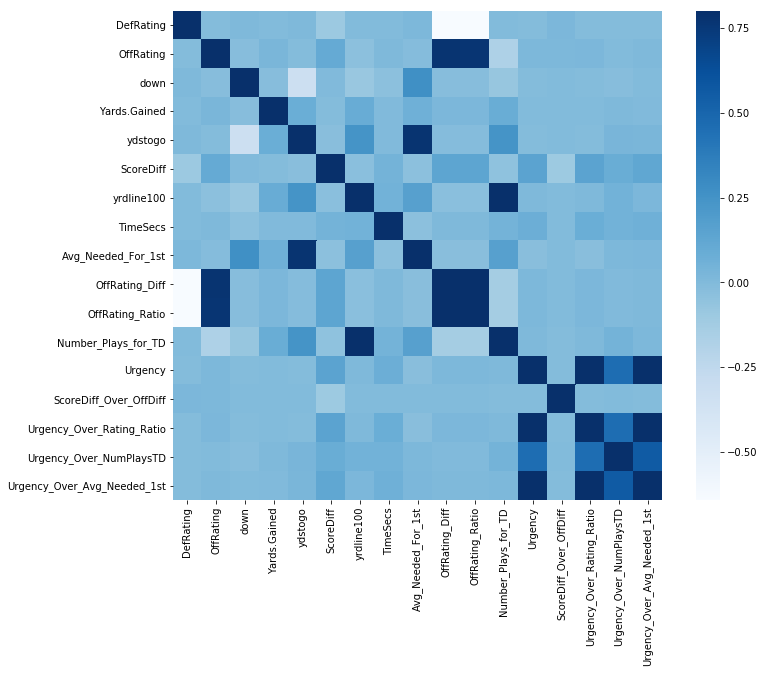

In [15]:
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(nfl2010correlationmatrix, vmax=.8, square=True, cmap='Blues')
plt.show()

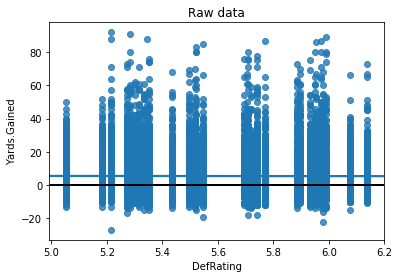

In [28]:
t = sns.regplot(
    'DefRating',
    'Yards.Gained',
    nfl2010,
    fit_reg=True
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

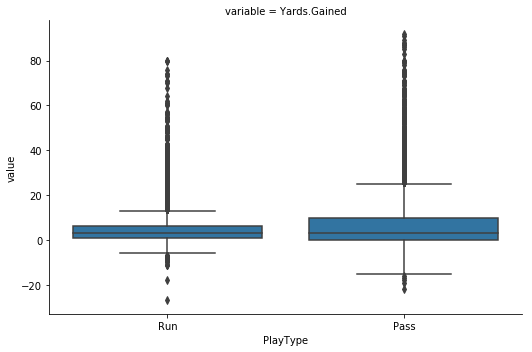

In [22]:
df_playtype =  nfl2010
df_playtype = pd.melt(df_playtype, id_vars=['PlayType'], 
                  value_vars = 'Yards.Gained')

g = sns.FacetGrid(df_playtype, col="variable", size=5, aspect=1.5)
g = g.map(sns.boxplot, "PlayType", "value")
plt.show()

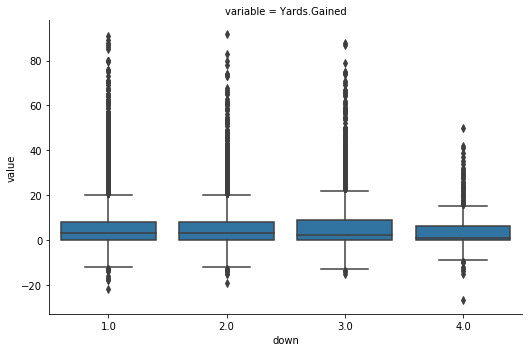

In [23]:
df_down =  nfl2010
df_down = pd.melt(df_down, id_vars=['down'], 
                  value_vars = 'Yards.Gained')

g = sns.FacetGrid(df_down, col="variable", size=5, aspect=1.5)
g = g.map(sns.boxplot, "down", "value")
plt.show()

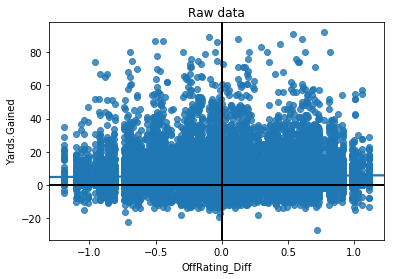

In [30]:
t = sns.regplot(
    'OffRating_Diff',
    'Yards.Gained',
    nfl2010,
    fit_reg=True
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

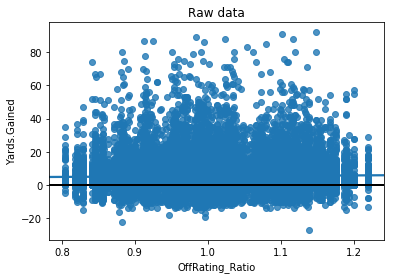

In [31]:
t = sns.regplot(
    'OffRating_Ratio',
    'Yards.Gained',
    nfl2010,
    fit_reg=True
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

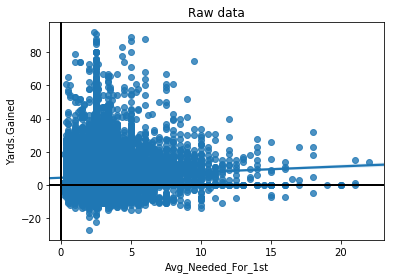

In [32]:
t = sns.regplot(
    'Avg_Needed_For_1st',
    'Yards.Gained',
    nfl2010,
    fit_reg=True
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

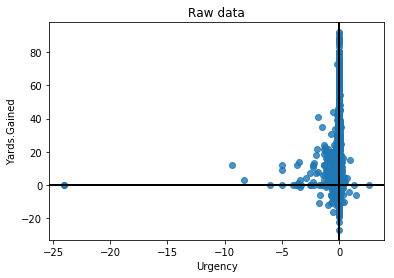

In [33]:
t = sns.regplot(
    'Urgency',
    'Yards.Gained',
    nfl2010,
    fit_reg=True
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

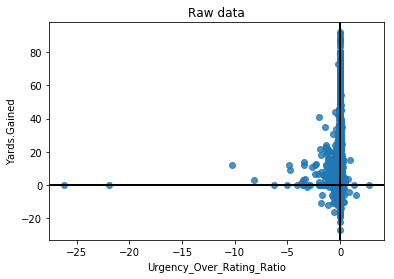

In [34]:
t = sns.regplot(
    'Urgency_Over_Rating_Ratio',
    'Yards.Gained',
    nfl2010,
    fit_reg=True
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

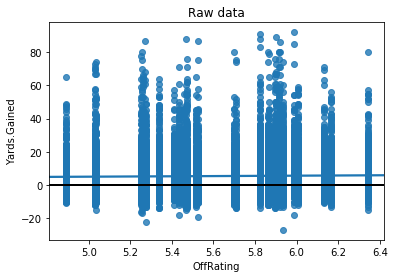

In [16]:
t = sns.regplot(
    'OffRating',
    'Yards.Gained',
    nfl2010,
    fit_reg=True
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

Mostly based on the correlation heatmap, the 5 best features are 'ydstogo', 'OffRating', 'yrdline100', Average Needed for 1st, and Number of plays for TD due to the highest correlation. Also type of play is helpful and downs are also helpful.